In [23]:
!nvidia-smi

Tue Jul 27 09:53:14 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P0    31W /  70W |   2736MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [24]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-07-27 09:53:15--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-07-27 09:53:15 (90.8 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [25]:
 from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

# Download the data

In [26]:
# Get 10% of the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2021-07-27 09:53:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.141.128, 2607:f8b0:4023:c0d::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   193MB/s    in 0.8s    

2021-07-27 09:53:16 (193 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [27]:
# Check images and subdirectories
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent

In [28]:
# Create training and test directories paths
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [29]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data_10_precent = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_dir,
    image_size=IMG_SIZE,
    label_mode="categorical",
    batch_size=BATCH_SIZE
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=test_dir,
    image_size=(224, 224),
    label_mode="categorical",
    batch_size=BATCH_SIZE
)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [30]:
train_data_10_precent

<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [31]:
# Check out class names of dataset
train_data_10_precent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

## Model 0: Functional API

In [32]:
# Create model using tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# Freeze the base model
base_model.trainable = False

#Create inputs into model
inputs = tf.keras.layers.Input(shape=(224, 224,3), name="input_layer")

# if using models like ResNet50V2, we need to normalize inputs
# x = tf.keras.layers.experimental.preprocessing.Normalization(1./255)(inputs)

# Pass the inputs to the base model
x = base_model(inputs)
print("Shape after passing inputs through base model: ", x.shape)

# Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print("Shape after GlobalAveragePooling2D: ", x.shape)

# Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

Shape after passing inputs through base model:  (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D:  (None, 1280)


In [33]:
# Compile the model
model_0.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [34]:
# Fit the model
history_0 = model_0.fit(
    train_data_10_precent,
    epochs=5,
    steps_per_epoch=len(train_data_10_precent),
    validation_data=test_data,
    validation_steps=int(0.25 * len(test_data)),
    callbacks=[create_tensorboard_callback(dir_name="transfer_learnig", 
                                           experiment_name="10_percent_feature_extraction")]
)

Saving TensorBoard log files to: transfer_learnig/10_percent_feature_extraction/20210727-095321
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 13s 316ms/step - loss: 1.9088 - accuracy: 0.3987 - val_loss: 1.3623 - val_accuracy: 0.6908
Epoch 2/5
24/24 [==============================] - 5s 199ms/step - loss: 1.1416 - accuracy: 0.7293 - val_loss: 0.9636 - val_accuracy: 0.7829
Epoch 3/5
24/24 [==============================] - 5s 198ms/step - loss: 0.8324 - accuracy: 0.8120 - val_loss: 0.7742 - val_accuracy: 0.8026
Epoch 4/5
24/24 [==============================] - 5s 197ms/step - loss: 0.6866 - accuracy: 0.8333 - val_loss: 0.7036 - val_accuracy: 0.8059
Epoch 5/5
24/24 [==============================] - 5s 203ms/step - loss: 0.5829 - accuracy: 0.8613 - val_loss: 0.6326 - val_accuracy: 0.8191


In [35]:
model_0.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling_layer (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


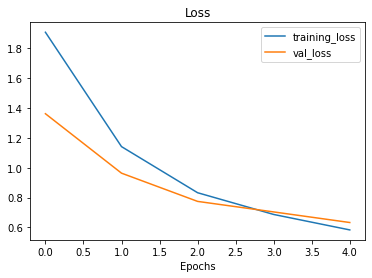

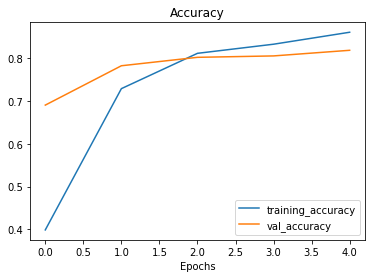

In [36]:
plot_loss_curves(history_0)

In [37]:
model_0.evaluate(test_data)

79/79 [==============================] - 9s 105ms/step - loss: 0.5980 - accuracy: 0.8408


[0.5980212092399597, 0.8407999873161316]

In [38]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
normalization_1 (Normalization) (None, None, None, 3 7           rescaling_1[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, None, None, 3 0           normalization_1[0][0]            
_____________________________________________________________________________________

## Getting a Feature Vector from trained model

In [42]:
# Define the input shape
input_shape = (1,4,4,3)

# Create a random tensor
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n{input_tensor} \n")

# Pass the random tensor through a global average pooling 2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor:\n {global_average_pooled_tensor} \n")

print(f"Shape of input tensor: {input_tensor.shape}\n")
print(f"Shape of global average pooled random tensor: {global_average_pooled_tensor.shape}\n")

Random input tensor:
[[[[-3.9519721e-01  1.4042784e-01  7.1646428e-01]
   [-3.3320457e-02 -1.3698932e+00 -1.6295897e+00]
   [ 7.5626783e-02  1.3755569e-02 -5.1209652e-01]
   [ 6.9111681e-01 -5.0209802e-01  5.8037424e-01]]

  [[-9.5111489e-01 -5.0183100e-01 -3.0859625e-01]
   [-2.3752849e+00 -3.9936322e-01 -1.0076707e-02]
   [-4.4220302e-01  5.6721467e-01  1.8191766e+00]
   [ 1.7724162e+00  8.5705596e-01  1.8601784e+00]]

  [[-1.3922787e+00 -2.4018102e+00  3.9918011e-01]
   [-4.4258645e-01 -8.6404020e-01  6.1003137e-01]
   [-6.9650930e-01 -7.1374923e-01 -1.1639632e+00]
   [-4.4459766e-01  1.0603324e+00  1.5130982e+00]]

  [[-2.7284078e-02  2.2168580e-02  5.6664145e-01]
   [-1.1563837e-01 -2.7567843e-01 -1.3161351e-01]
   [ 1.3107809e+00 -4.9924493e-01  7.8312313e-04]
   [ 5.6091094e-01  4.6223173e-01 -1.2979192e+00]]]] 

2D global average pooled random tensor:
 [[-0.18157272 -0.2752826   0.18825455]] 

Shape of input tensor: (1, 4, 4, 3)

Shape of global average pooled random tensor: (1

In [43]:
# Raplicate GlobalAveragePooled2D layer
tf.reduce_mean(input_tensor, axis=[1, 2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.18157272, -0.2752826 ,  0.18825455]], dtype=float32)>